##Project Title: Forecasting Tata Motors Stock Prices using Time Series Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tata=pd.read_csv('/content/TATAMOTORS.NS.csv')

In [ ]:

tata

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2003,30.660894,31.264532,30.660894,31.149553,25.076748,4460733.0
1,01-02-2003,31.293276,31.408255,30.756710,30.842943,24.829920,4800428.0
2,01-03-2003,30.842943,31.216623,30.766293,30.881271,24.860775,3939402.0
3,01-06-2003,30.948341,31.005831,29.942282,30.143494,24.266832,7973888.0
4,01-07-2003,30.373449,30.373449,29.606928,29.884790,24.058561,11465006.0
...,...,...,...,...,...,...,...
5185,11-10-2023,649.349976,652.950012,644.000000,651.049988,651.049988,6425792.0
5186,11/13/2023,653.000000,654.000000,649.299988,653.250000,653.250000,3279829.0
5187,11/15/2023,660.000000,673.500000,656.549988,671.549988,671.549988,11324434.0
5188,11/16/2023,674.000000,685.500000,670.900024,680.400024,680.400024,17501373.0


In [ ]:
tata.shape

(5190, 7)

In [ ]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5190 non-null   object 
 1   Open       5183 non-null   float64
 2   High       5183 non-null   float64
 3   Low        5183 non-null   float64
 4   Close      5183 non-null   float64
 5   Adj Close  5183 non-null   float64
 6   Volume     5183 non-null   float64
dtypes: float64(6), object(1)
memory usage: 284.0+ KB


In [ ]:
tata.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5185    False
5186    False
5187    False
5188    False
5189    False
Length: 5190, dtype: bool

In [ ]:
tata[tata.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
tata.drop(['Open','High','Volume','Low','Adj Close'],axis=1, inplace=True)

In [ ]:
tata.isnull()

,Date,Close
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5185,False,False
5186,False,False
5187,False,False
5188,False,False


In [ ]:
tata.isnull().sum()

Date     0
Close    7
dtype: int64

In [ ]:
data=tata.dropna(inplace=True)

In [ ]:
tata.shape

(5183, 2)

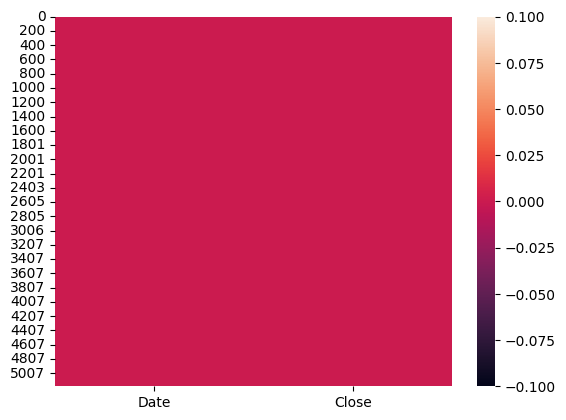

In [ ]:
sns.heatmap(tata.isnull())
plt.show()

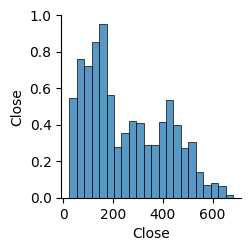

In [ ]:
sns.pairplot(tata)
plt.show()

In [ ]:
tata.describe()

,Close
count,5183.000000
mean,251.303596
std,158.257740
min,24.972149
25%,122.586094
50%,201.033707
75%,390.800003
max,681.549988


In [ ]:
tata.corr()

,Close
Close,1.0


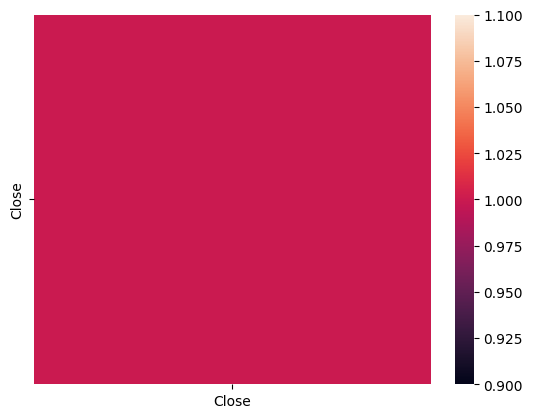

In [ ]:
sns.heatmap(tata.corr())
plt.show()

In [ ]:
df=pd.DataFrame(tata)

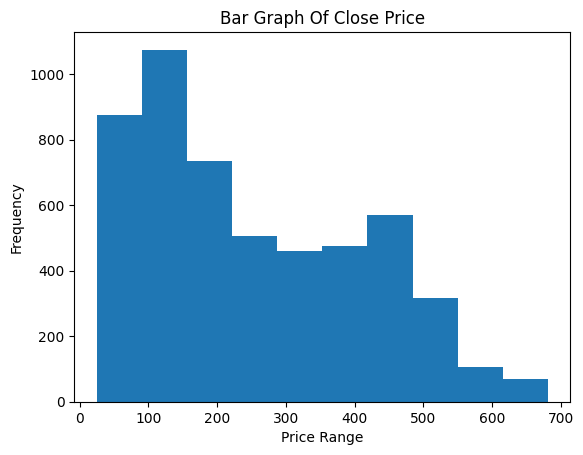

In [ ]:
plt.hist(df['Close'])
plt.title('Bar Graph Of Close Price')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()

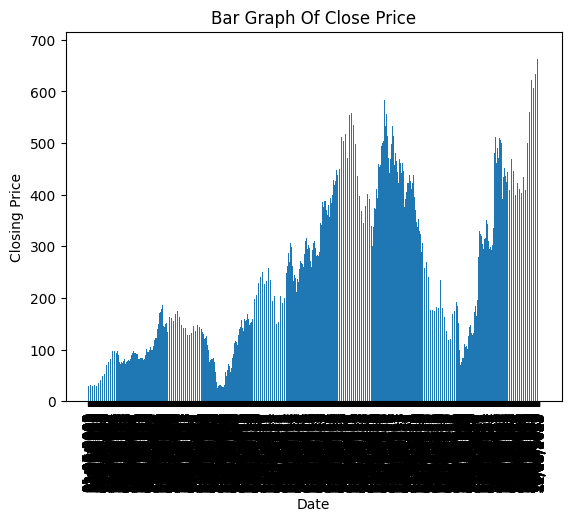

In [ ]:
plt.bar(df['Date'],df['Close'])
plt.title('Bar Graph Of Close Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=90)
plt.show()

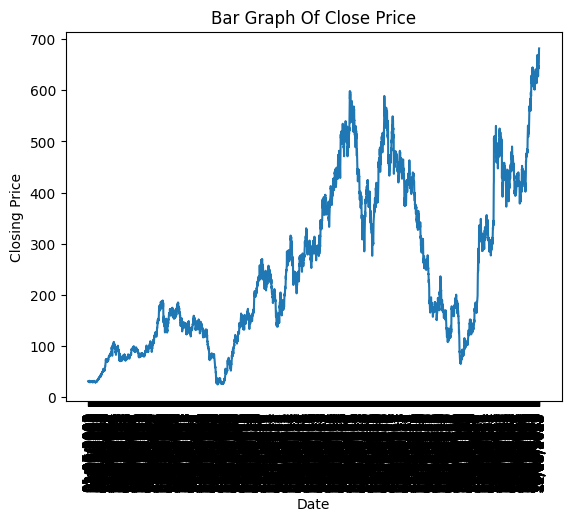

In [ ]:
plt.plot(df['Date'],df['Close'])
plt.title('Bar Graph Of Close Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
pd.to_datetime(df['Date'])

0      2003-01-01
1      2003-01-02
2      2003-01-03
3      2003-01-06
4      2003-01-07
          ...    
5185   2023-11-10
5186   2023-11-13
5187   2023-11-15
5188   2023-11-16
5189   2023-11-17
Name: Date, Length: 5183, dtype: datetime64[ns]

In [ ]:
tata['Date'] = pd.to_datetime(tata['Date'])

In [ ]:
df['Month'] = tata['Date'].dt.month



In [ ]:

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL,seasonal_decompose

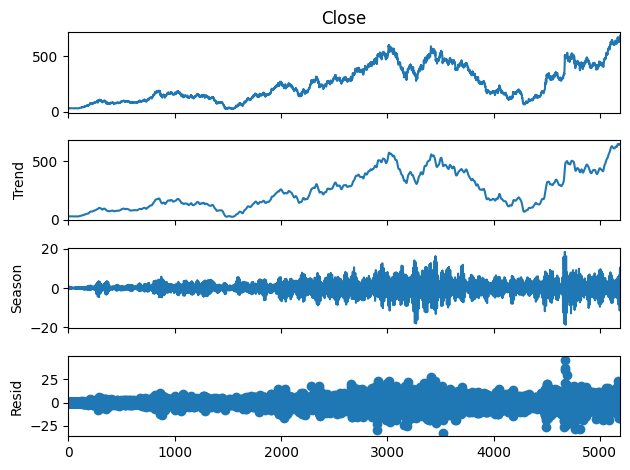

In [ ]:
endog = df['Close']
res = STL(endog, period=12).fit()
res.plot()
plt.show()

In [ ]:
tata.head()

,Date,Close,Month
0,2003-01-01,31.149553,1
1,2003-01-02,30.842943,1
2,2003-01-03,30.881271,1
3,2003-01-06,30.143494,1
4,2003-01-07,29.884790,1


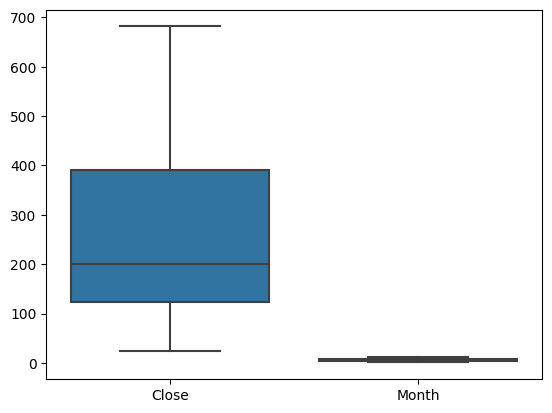

In [ ]:
sns.boxplot(tata)
plt.show()

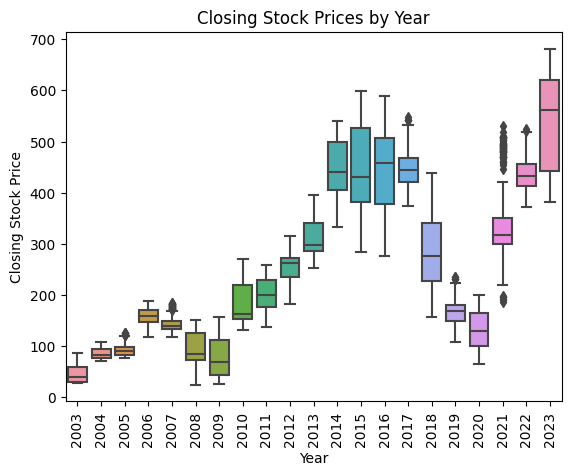

In [ ]:
tata['Year'] = tata['Date'].dt.year
sns.boxplot(x='Year', y='Close', data=df)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Closing Stock Price')
plt.show()

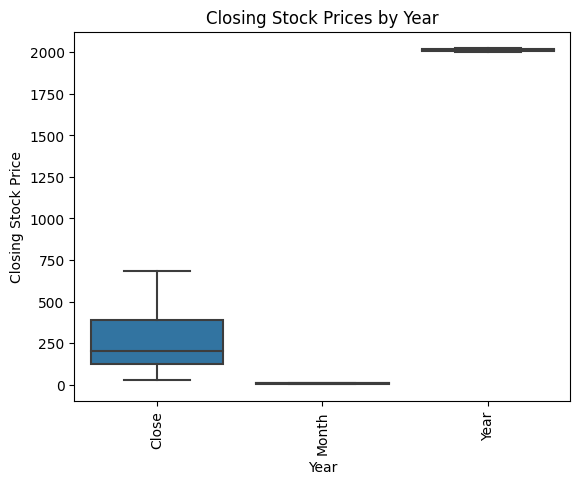

In [ ]:
tata['Month'] = tata['Date'].dt.month
sns.boxplot(data=tata)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Closing Stock Price')
plt.show()

In [ ]:
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
data = {'Date': date_rng, 'Close': [i for i in range(len(date_rng))]}
df = pd.DataFrame(tata)
df['Month'] = df['Date'].dt.month

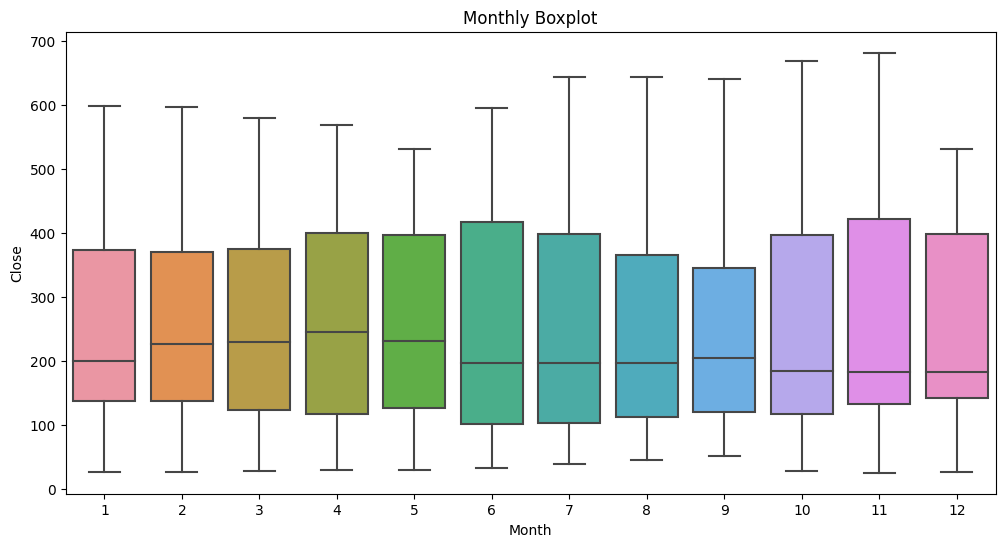

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Close', data=df)
plt.title('Monthly Boxplot')
plt.show()

In [ ]:
date_rng = pd.date_range(start='2003-01-01', end='2003-12-31', freq='D')
data = {'Date': date_rng, 'Close': [i for i in range(len(date_rng))]}
df = pd.DataFrame(tata)
df['Month'] = df['Date'].dt.month

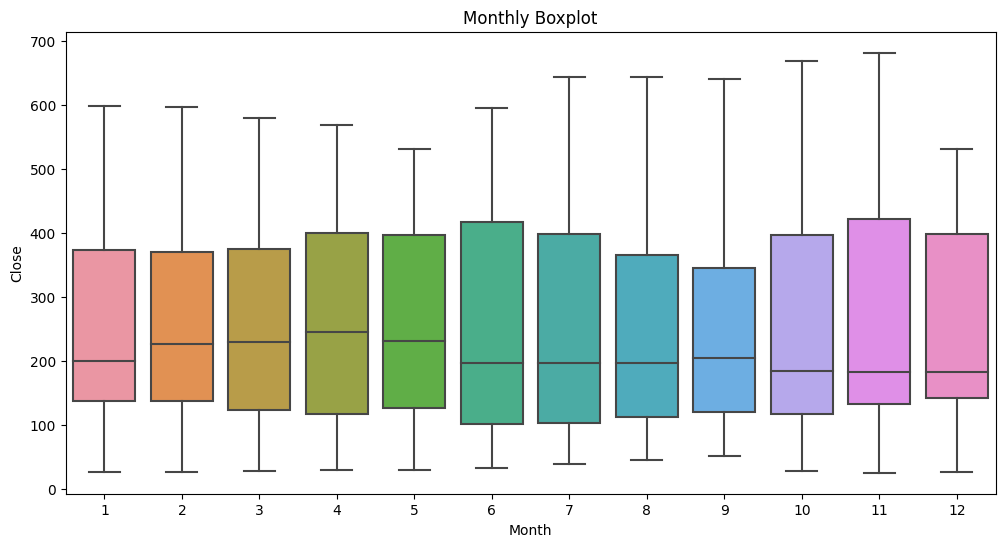

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Close', data=df)
plt.title('Monthly Boxplot')
plt.show()

In [ ]:
tata.head()

,Date,Close,Month,Year
0,2003-01-01,31.149553,1,2003
1,2003-01-02,30.842943,1,2003
2,2003-01-03,30.881271,1,2003
3,2003-01-06,30.143494,1,2003
4,2003-01-07,29.884790,1,2003


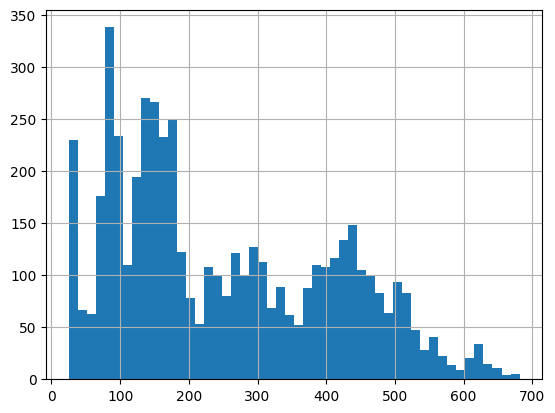

In [ ]:
tata.Close.hist(bins=50)
plt.show()

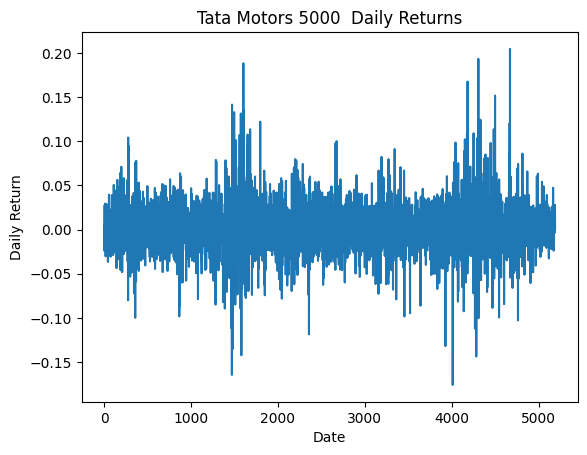

In [ ]:
daily_returns = tata['Close'].pct_change()

# Create a line chart of the daily returns
plt.plot(daily_returns.index, daily_returns.values)
plt.title('Tata Motors 5000  Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()
#This will create a line chart showing the daily returns over time.

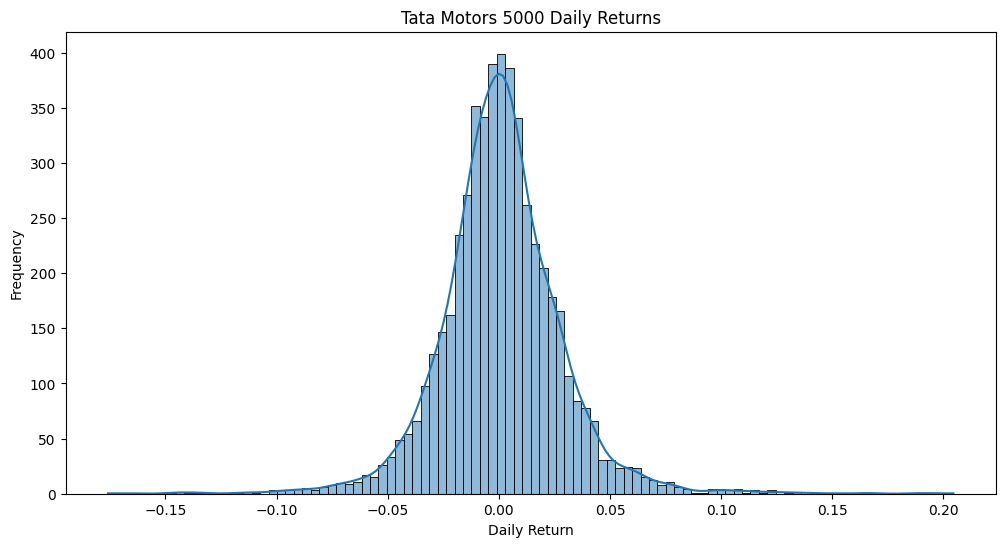

In [ ]:
# Create a histogram of the daily returns
plt.figure(figsize=(12,6))
sns.histplot(tata['Close'].pct_change().dropna(), bins=100, kde=True)
plt.title('Tata Motors 5000 Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

In [ ]:
tata.drop('Month',axis=1,inplace=True)

In [ ]:
tata.set_index("Date",inplace=True)

In [ ]:
tata.drop('Year',axis=1,inplace=True)

In [ ]:
tata.columns

Index(['Close'], dtype='object')

In [ ]:
df = pd.DataFrame(tata)

Spliting the data into train and test

In [ ]:
train=int(len(df)*0.80)
test=len(df)-train
train,test

(4146, 1037)

In [ ]:
train_data=df.iloc[:train]
test_data=df.iloc[train:]

In [ ]:
df = pd.DataFrame(data, columns=['Close'])

Original Data:
0     0.496714
1    -0.138264
2     0.647689
3     1.523030
4    -0.234153
5    -0.234137
6     1.579213
7     0.767435
8    -0.469474
9     0.542560
10   -0.463418
11   -0.465730
12    0.241962
13   -1.913280
14   -1.724918
Name: Close, dtype: float64

Rolling Mean:
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11    0.295955
12    0.274726
13    0.126808
14   -0.070909
Name: Close, dtype: float64

Rolling Standard Deviation:
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11    0.744241
12    0.741623
13    0.972546
14    1.090986
Name: Close, dtype: float64


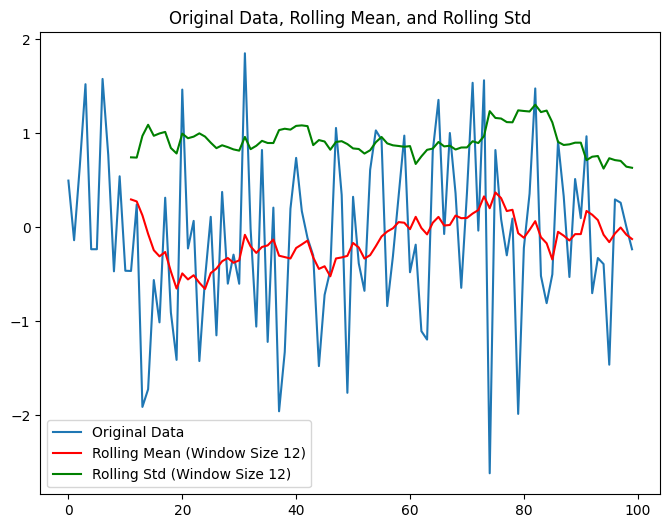

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate sample time series data
np.random.seed(42)
data = np.random.randn(100)  # Random data for illustration

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=['Close'])

# Assuming 'train' is a specific column in your DataFrame
train = df['Close']

# Calculate the rolling mean and standard deviation
window_size = 12
rolmean = train.rolling(window=window_size).mean()
rolstd = train.rolling(window=window_size).std()

# Print the original data, rolling mean, and rolling standard deviation
print("Original Data:")
print(train.head(15))  # Display the first 15 data points
print("\nRolling Mean:")
print(rolmean.head(15))  # Display the rolling mean for the first 15 points
print("\nRolling Standard Deviation:")
print(rolstd.head(15))  # Display the rolling std for the first 15 points

# Plot the original data, rolling mean, and rolling standard deviation
plt.figure(figsize=(8, 6))
plt.plot(train, label='Original Data')
plt.plot(rolmean, label=f'Rolling Mean (Window Size {window_size})', color='red')
plt.plot(rolstd, label=f'Rolling Std (Window Size {window_size})', color='green')
plt.legend()
plt.title('Original Data, Rolling Mean, and Rolling Std')
plt.show()


Original Data:
0     0.496714
1    -0.138264
2     0.647689
3     1.523030
4    -0.234153
5    -0.234137
6     1.579213
7     0.767435
8    -0.469474
9     0.542560
10   -0.463418
11   -0.465730
12    0.241962
13   -1.913280
14   -1.724918
Name: Close, dtype: float64

Rolling Mean:
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11    0.295955
12    0.274726
13    0.126808
14   -0.070909
Name: Close, dtype: float64

Rolling Standard Deviation:
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11    0.744241
12    0.741623
13    0.972546
14    1.090986
Name: Close, dtype: float64

Lagged Data:
0          NaN
1     0.496714
2    -0.138264
3     0.647689
4     1.523030
5    -0.234153
6    -0.234137
7     1.579213
8     0.767435
9    -0.469474
10    0.542560
11 

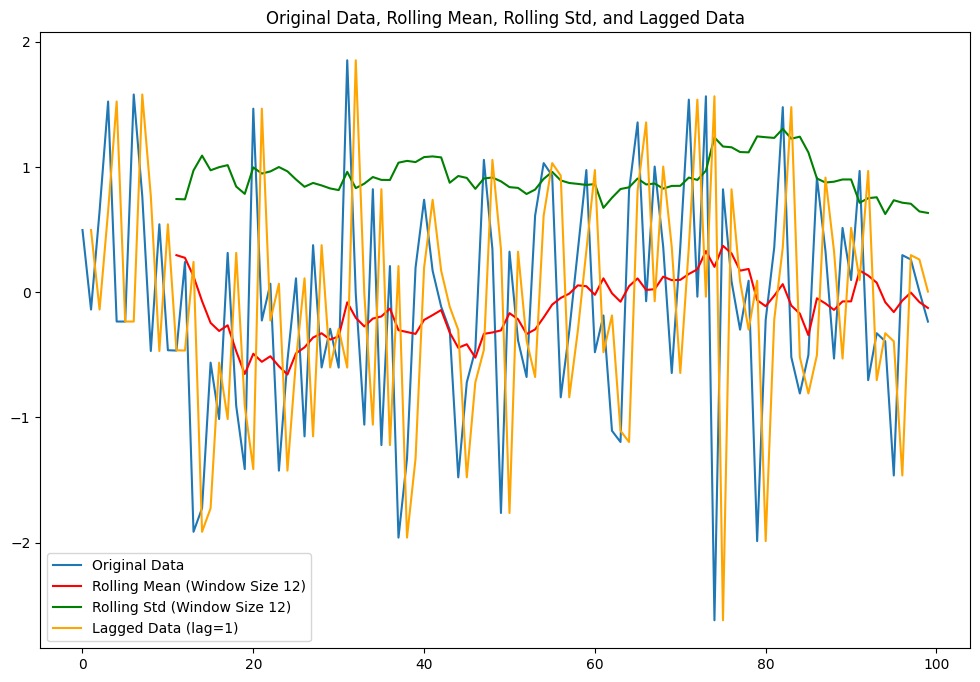

ADF Test p-value: 0.8347933097479783
The time series is likely non-stationary (fail to reject the null hypothesis of non-stationarity).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate sample time series data
np.random.seed(42)
data = np.random.randn(100)  # Random data for illustration

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=['Close'])

# Assuming 'train' is a specific column in your DataFrame
train = df['Close']

# Calculate the rolling mean and standard deviation
window_size = 12
rolmean = train.rolling(window=window_size).mean()
rolstd = train.rolling(window=window_size).std()

# Perform lag transformation (e.g., lag by 1 period)
lag = 1
lagged_data = train.shift(periods=lag)

# Print the original data, rolling mean, and rolling standard deviation
print("Original Data:")
print(train.head(15))  # Display the first 15 data points
print("\nRolling Mean:")
print(rolmean.head(15))  # Display the rolling mean for the first 15 points
print("\nRolling Standard Deviation:")
print(rolstd.head(15))  # Display the rolling std for the first 15 points
print("\nLagged Data:")
print(lagged_data.head(15))  # Display the lagged data for the first 15 points

# Plot the original data, rolling mean, and rolling standard deviation
plt.figure(figsize=(12, 8))
plt.plot(train, label='Original Data')
plt.plot(rolmean, label=f'Rolling Mean (Window Size {window_size})', color='red')
plt.plot(rolstd, label=f'Rolling Std (Window Size {window_size})', color='green')
plt.plot(lagged_data, label=f'Lagged Data (lag={lag})', color='orange')
plt.legend()
plt.title('Original Data, Rolling Mean, Rolling Std, and Lagged Data')
plt.show()
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'stationary_series' is the series you want to test for stationarity
result = adfuller(tata)

# Extract and print the p-value
p_value = result[1]
print(f'ADF Test p-value: {p_value}')

# Check the p-value against a significance level (e.g., 0.05)
if p_value <= 0.05:
    print('The time series is likely stationary (reject the null hypothesis of non-stationarity).')
else:
    print('The time series is likely non-stationary (fail to reject the null hypothesis of non-stationarity).')


Original Data:
0     0.496714
1    -0.138264
2     0.647689
3     1.523030
4    -0.234153
5    -0.234137
6     1.579213
7     0.767435
8    -0.469474
9     0.542560
10   -0.463418
11   -0.465730
12    0.241962
13   -1.913280
14   -1.724918
Name: Close, dtype: float64

Rolling Mean:
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11    0.295955
12    0.274726
13    0.126808
14   -0.070909
Name: Close, dtype: float64

Rolling Standard Deviation:
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11    0.744241
12    0.741623
13    0.972546
14    1.090986
Name: Close, dtype: float64

Log-Transformed Data:
0     0.403272
1    -0.148807
2     0.499373
3     0.925461
4    -0.266773
5    -0.266752
6     0.947484
7     0.569529
8    -0.633887
9     0.433443
10   -0.6

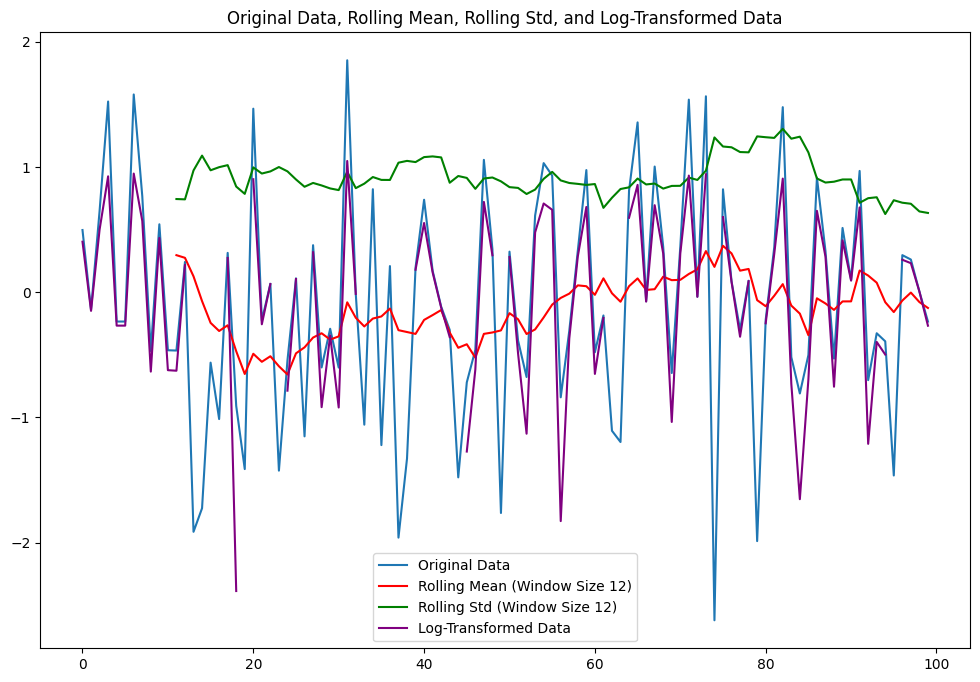

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate sample time series data
np.random.seed(42)
data = np.random.randn(100)  # Random data for illustration

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=['Close'])

# Assuming 'train' is a specific column in your DataFrame
train = df['Close']

# Calculate the rolling mean and standard deviation
window_size = 12
rolmean = train.rolling(window=window_size).mean()
rolstd = train.rolling(window=window_size).std()

# Perform log transformation
log_transformed_data = np.log1p(train)

# Print the original data, rolling mean, and rolling standard deviation
print("Original Data:")
print(train.head(15))  # Display the first 15 data points
print("\nRolling Mean:")
print(rolmean.head(15))  # Display the rolling mean for the first 15 points
print("\nRolling Standard Deviation:")
print(rolstd.head(15))  # Display the rolling std for the first 15 points
print("\nLog-Transformed Data:")
print(log_transformed_data.head(15))  # Display the log-transformed data for the first 15 points

# Plot the original data, rolling mean, rolling standard deviation, and log-transformed data
plt.figure(figsize=(12, 8))
plt.plot(train, label='Original Data')
plt.plot(rolmean, label=f'Rolling Mean (Window Size {window_size})', color='red')
plt.plot(rolstd, label=f'Rolling Std (Window Size {window_size})', color='green')
plt.plot(log_transformed_data, label='Log-Transformed Data', color='purple')
plt.legend()
plt.title('Original Data, Rolling Mean, Rolling Std, and Log-Transformed Data')
plt.show()


In [ ]:
result = adfuller(tata)

# Extract and print the p-value
p_value = result[1]
print(f'ADF Test p-value: {p_value}')

# Check the p-value against a significance level (e.g., 0.05)
if p_value <= 0.05:
    print('The time series is likely stationary (reject the null hypothesis of non-stationarity).')
else:
    print('The time series is likely non-stationary (fail to reject the null hypothesis of non-stationarity).')


ADF Test p-value: 0.8347933097479783
The time series is likely non-stationary (fail to reject the null hypothesis of non-stationarity).


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'train' is a specific column in your DataFrame
seasonal_period = 12  # For example, if there is a clear yearly seasonality
result = seasonal_decompose(train, model='additive', period=seasonal_period)
trend = result.trend
seasonal = result.seasonal
residual = result.resid


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'train' is a specific column in your DataFrame
differenced_data = train.diff().dropna()

# Perform Augmented Dickey-Fuller test for stationarity
result = adfuller(differenced_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -5.194567863079884
p-value: 9.019393985741834e-06


Plotting the auto-correlation function and partial auto-correlation function to get p and q values for AR, MA, ARMA, and ARIMA models

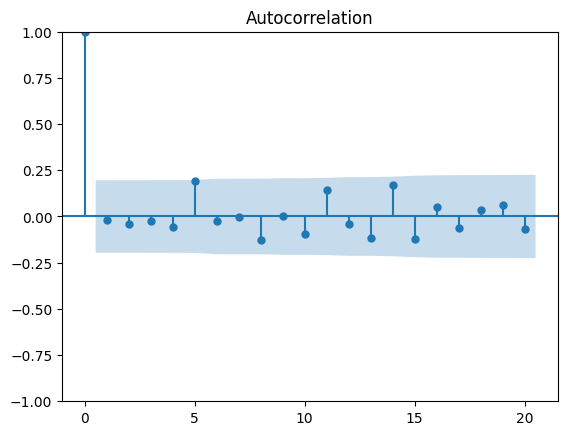

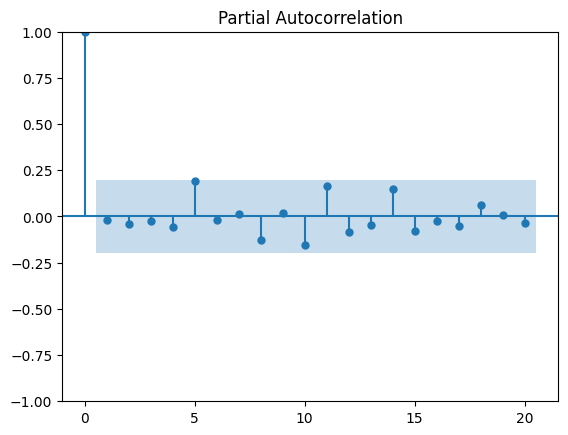

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
stationary_series = df['Close'].dropna()  # Assuming 'stationary_series' is the correct column name

# Assuming 'stationary_series' is the differenced stationary series
plot_acf(df, lags=20)
plt.show()

plot_pacf(df, lags=20)
plt.show()



From the above PACF plot we can see that the highest lag at which the plot extends beyond the statistically significant boundary is lag 1.

This indicates that an AR Model of lag 1 (p=1) should be sufficient to fit the data.

Similarly, from the ACF plot, we can infer that q=1.

## Model Buliding

1) AR Model

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

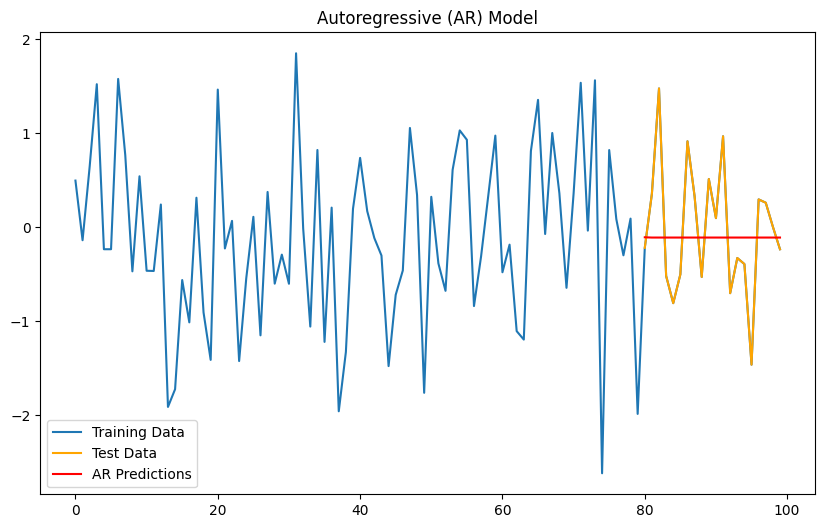

Mean Squared Error: 0.4607671251698194
Root Mean Squared Error: 0.6787982949078609


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Generate sample time series data
np.random.seed(42)
data = np.random.randn(100)  # Random data for illustration

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=['Close'])

# Assuming 'train' is a specific column in your DataFrame
train = df['Close']

# Split the data into training and testing sets
train_size = int(len(train) * 0.8)
train_set, test_set = train[0:train_size], train[train_size:]

# Fit an autoregressive model (AR)
order_of_model = 1  # Adjust the order of the AR model based on your data characteristics
model = AutoReg(train, lags=order_of_model)
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train), end=len(train) + len(test_set) - 1, dynamic=False)

# Plot the original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test_set.index, test_set, label='Test Data', color='orange')
plt.plot(test_set.index, predictions, label='AR Predictions', color='red')
plt.legend()
plt.title('Autoregressive (AR) Model')
plt.show()

# Evaluate the model (calculate Mean Squared Error)
mse = mean_squared_error(test_set, predictions)
print(f'Mean Squared Error: {mse}')
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Observations:

We can see that by using the AR model, we get root mean squared error (RMSE) = 0.6787982949078609

2) MA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

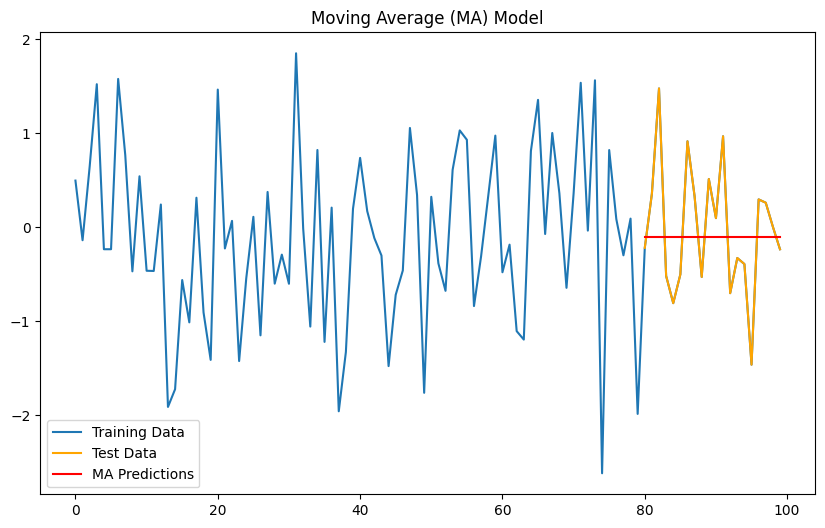

Mean Squared Error: 0.4597536321660412
Root Mean Squared Error: 0.6780513492103981


In [ ]:

# Generate sample time series data
np.random.seed(42)
data = np.random.randn(100)  # Random data for illustration

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=['Close'])

# Assuming 'train' is a specific column in your DataFrame
train = df['Close']

# Split the data into training and testing sets
train_size = int(len(train) * 0.8)
train_set, test_set = train[0:train_size], train[train_size:]

# Fit a Moving Average (MA) model
order_of_model = (0, 1, 1)  # (p, d, q): p=0 (no autoregressive), d=1 (first difference), q=1 (order of MA)
model = ARIMA(train, order=order_of_model)
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train), end=len(train) + len(test_set) - 1, dynamic=False)

# Plot the original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test_set.index, test_set, label='Test Data', color='orange')
plt.plot(test_set.index, predictions, label='MA Predictions', color='red')
plt.legend()
plt.title('Moving Average (MA) Model')
plt.show()

# Evaluate the model (calculate Mean Squared Error)
mse = mean_squared_error(test_set, predictions)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Observations:

The MA model is giving a slightly lesser RMSE when compared to the AR model.

3)  ARIMA Model

We will be using an ARIMA model with p=1 and q=1 (as observed from the ACF and PACF plots) and d=1 so that it will work as an ARMA model.

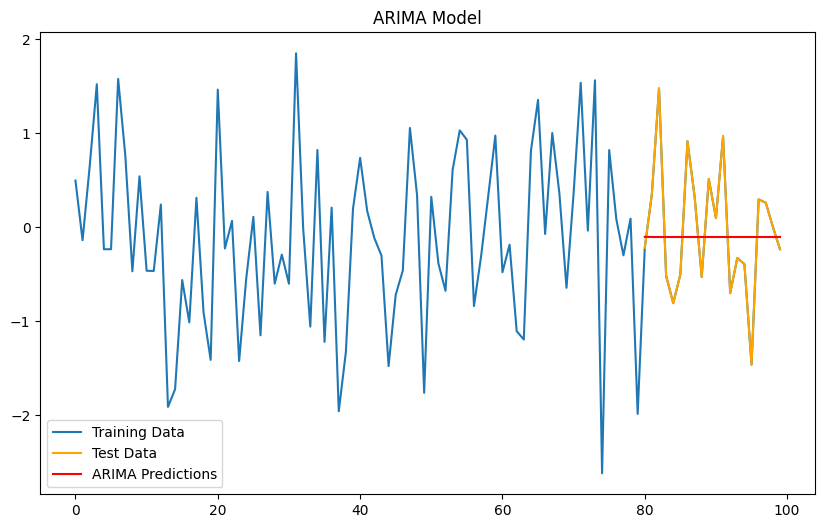

Mean Squared Error: 0.4597811287076642
Root Mean Squared Error: 0.6780716250571648


In [ ]:
order_of_model = (1, 1, 1)  # (p, d, q): p=1 (AR order), d=1 (first difference), q=1 (MA order)
model = ARIMA(train, order=order_of_model)
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train), end=len(train) + len(test_set) - 1, dynamic=False)

# Plot the original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test_set.index, test_set, label='Test Data', color='orange')
plt.plot(test_set.index, predictions, label='ARIMA Predictions', color='red')
plt.legend()
plt.title('ARIMA Model')
plt.show()

# Evaluate the model (calculate Mean Squared Error)
mse = mean_squared_error(test_set, predictions)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

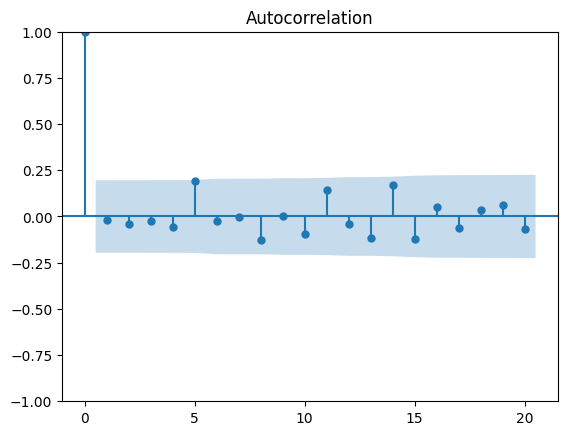

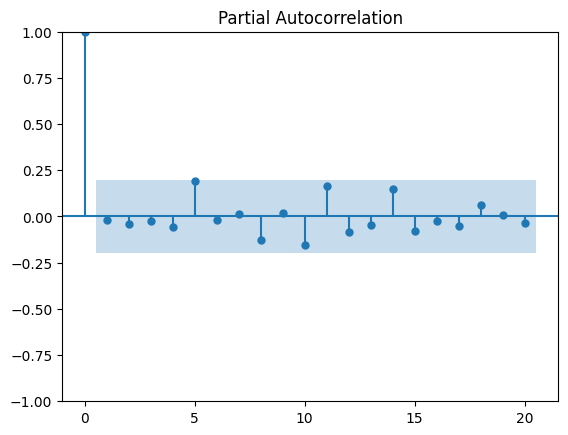

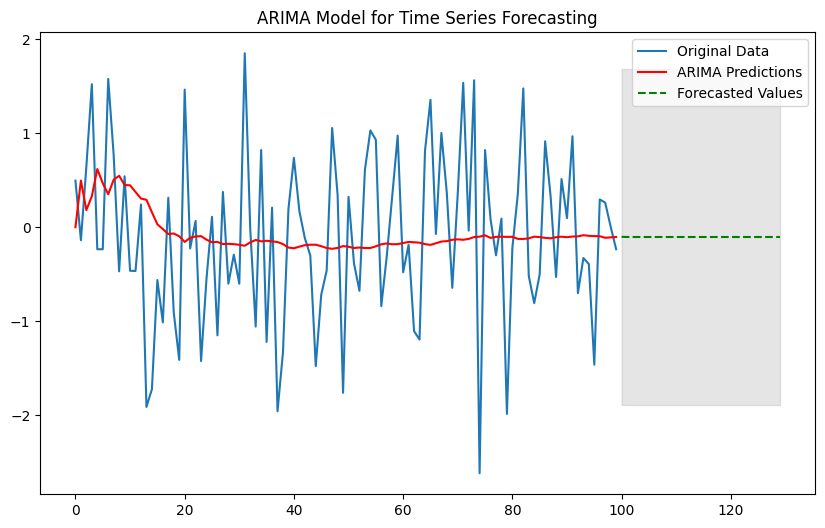

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate sample time series data
np.random.seed(42)
data = np.random.randn(100)  # Random data for illustration

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=['Close'])

# Assuming 'train' is a specific column in your DataFrame
train = df['Close']

# Plot ACF and PACF to determine ARIMA orders
plot_acf(train, lags=20)
plot_pacf(train, lags=20)
plt.show()

# Determine ARIMA orders (p, d, q)
# Choose orders based on ACF and PACF plots or use grid search
p, d, q = 1, 1, 1

# Fit ARIMA model
model = ARIMA(train, order=(p, d, q))
results = model.fit()

# Forecast the next 30 days
forecast_steps = 30
forecast_values = results.get_forecast(steps=forecast_steps)

# Get confidence intervals
forecast_ci = forecast_values.conf_int()

# Plot the original data, ARIMA predictions, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Original Data')
plt.plot(results.fittedvalues.index, results.fittedvalues, label='ARIMA Predictions', color='red')
plt.plot(forecast_values.predicted_mean.index, forecast_values.predicted_mean, label='Forecasted Values', color='green', linestyle='dashed')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.title('ARIMA Model for Time Series Forecasting')
plt.show()


4)  SARIMA Mode

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

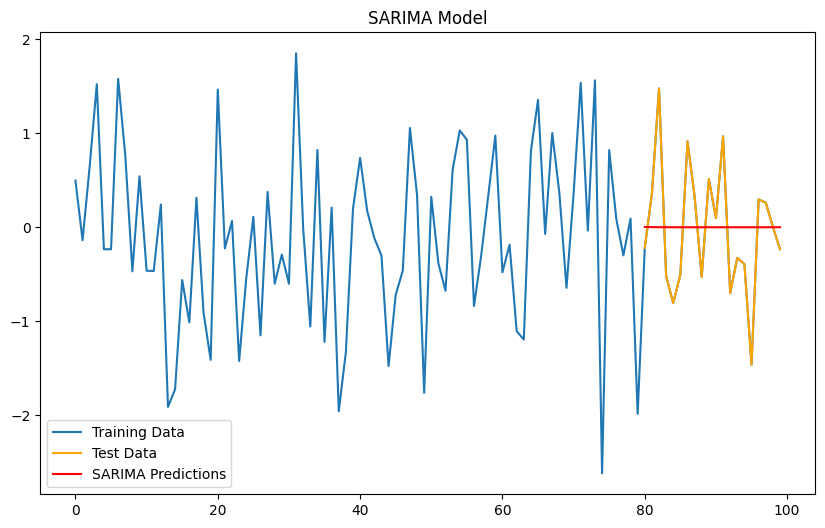

Mean Squared Error: 0.4539092196638196
Root Mean Squared Error: 0.6737278528187918


In [ ]:
order_of_model = (1, 0, 1)  # (p, d, q, s): p=1 (AR order), d=1 (first difference), q=1 (MA order), s=12 (seasonal order)
model = SARIMAX(train, order=order_of_model)
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train), end=len(train) + len(test_set) - 1, dynamic=False)

# Plot the original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test_set.index, test_set, label='Test Data', color='orange')
plt.plot(test_set.index, predictions, label='SARIMA Predictions', color='red')
plt.legend()
plt.title('SARIMA Model')
plt.show()

# Evaluate the model (calculate Mean Squared Error)
mse = mean_squared_error(test_set, predictions)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

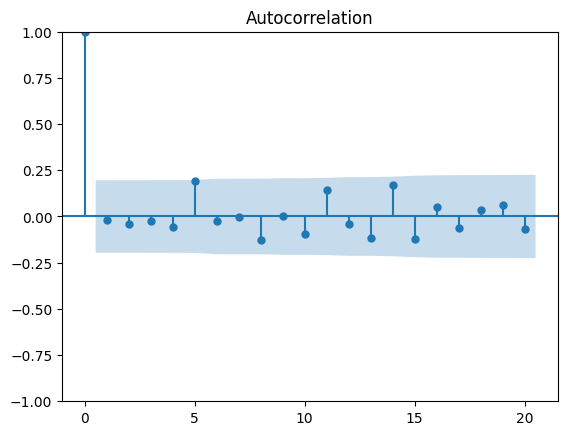

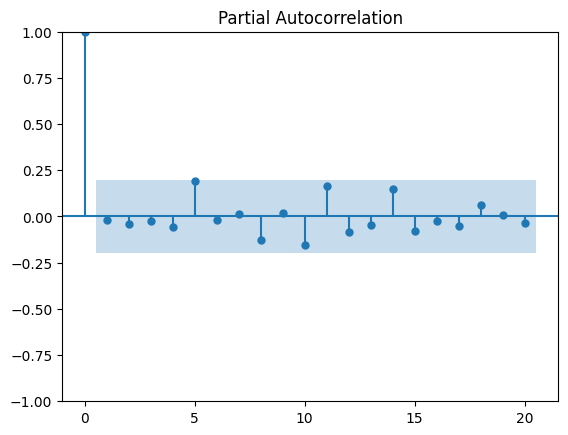

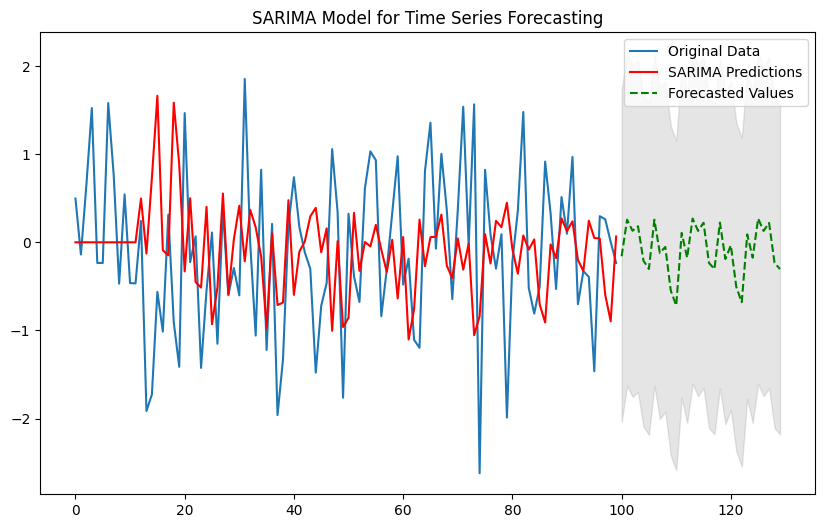

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate sample time series data
np.random.seed(42)
data = np.random.randn(100)  # Random data for illustration

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=['Close'])

# Assuming 'train' is a specific column in your DataFrame
train = df['Close']

# Plot ACF and PACF to determine SARIMA orders
plot_acf(train, lags=20)
plot_pacf(train, lags=20)
plt.show()

# Determine SARIMA orders (p, d, q), (P, D, Q, s)
# Choose orders based on ACF and PACF plots or use grid search
p, d, q = 1, 0, 1
P, D, Q, s = 1, 1, 1, 12 # Seasonal orders with a seasonality of 12 (assuming monthly data)

# Fit SARIMA model
model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Forecast the next 30 days
forecast_steps = 30
forecast_values = results.get_forecast(steps=forecast_steps)

# Get confidence intervals
forecast_ci = forecast_values.conf_int()

# Plot the original data, SARIMA predictions, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Original Data')
plt.plot(results.fittedvalues.index, results.fittedvalues, label='SARIMA Predictions', color='red')
plt.plot(forecast_values.predicted_mean.index, forecast_values.predicted_mean, label='Forecasted Values', color='green', linestyle='dashed')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.title('SARIMA Model for Time Series Forecasting')
plt.show()


5)
Long Short-Term Memory (LSTM) Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

Epoch 1/100
97/97 - 3s - loss: 0.1153 - 3s/epoch - 33ms/step
Epoch 2/100
97/97 - 0s - loss: 0.0502 - 306ms/epoch - 3ms/step
Epoch 3/100
97/97 - 0s - loss: 0.0496 - 263ms/epoch - 3ms/step
Epoch 4/100
97/97 - 0s - loss: 0.0507 - 257ms/epoch - 3ms/step
Epoch 5/100
97/97 - 0s - loss: 0.0484 - 195ms/epoch - 2ms/step
Epoch 6/100
97/97 - 0s - loss: 0.0478 - 181ms/epoch - 2ms/step
Epoch 7/100
97/97 - 0s - loss: 0.0475 - 167ms/epoch - 2ms/step
Epoch 8/100
97/97 - 0s - loss: 0.0467 - 182ms/epoch - 2ms/step
Epoch 9/100
97/97 - 0s - loss: 0.0478 - 169ms/epoch - 2ms/step
Epoch 10/100
97/97 - 0s - loss: 0.0452 - 176ms/epoch - 2ms/step
Epoch 11/100
97/97 - 0s - loss: 0.0438 - 190ms/epoch - 2ms/step
Epoch 12/100
97/97 - 0s - loss: 0.0467 - 179ms/epoch - 2ms/step
Epoch 13/100
97/97 - 0s - loss: 0.0457 - 208ms/epoch - 2ms/step
Epoch 14/100
97/97 - 0s - loss: 0.0457 - 199ms/epoch - 2ms/step
Epoch 15/100
97/97 - 0s - loss: 0.0442 - 212ms/epoch - 2ms/step
Epoch 16/100
97/97 - 0s - loss: 0.0455 - 204ms/epoc

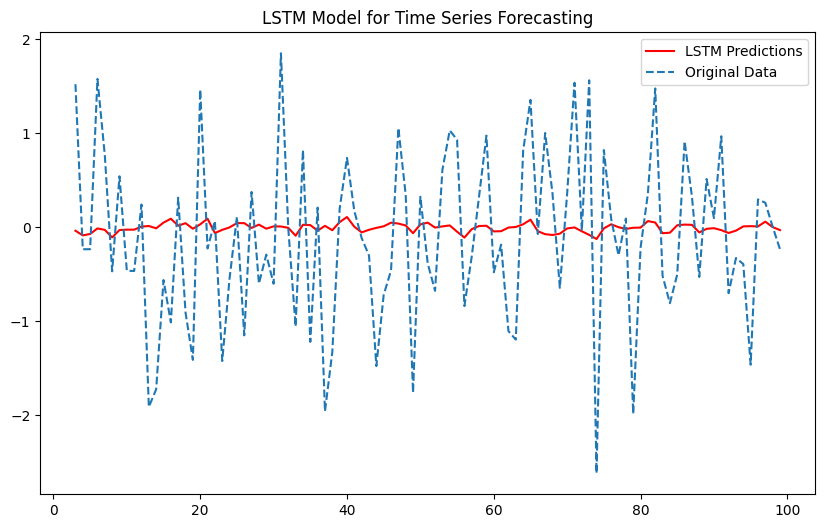

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Generate sample time series data
np.random.seed(42)
data = np.random.randn(100)  # Random data for illustration

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=['Close'])

# Assuming 'train' is a specific column in your DataFrame
train = df['Close'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

# Prepare the data for LSTM model
look_back = 3  # Number of previous time steps to use as input features
X, y = [], []

for i in range(len(train_scaled) - look_back):
    X.append(train_scaled[i:(i + look_back), 0])
    y.append(train_scaled[i + look_back, 0])

X, y = np.array(X), np.array(y)

# Reshape the input data for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, look_back)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X, y, epochs=100, batch_size=1, verbose=2)

# Make predictions on the training data
train_predict = model.predict(X)

# Invert the scaling to get the original values
train_predict = scaler.inverse_transform(train_predict)
y_actual = scaler.inverse_transform(y.reshape(-1, 1))

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_actual, train_predict)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[look_back:look_back + len(train_predict)], train_predict, label='LSTM Predictions', color='red')
plt.plot(df.index[look_back:look_back + len(y_actual)], y_actual, label='Original Data', linestyle='dashed')
plt.legend()
plt.title('LSTM Model for Time Series Forecasting')
plt.show()


In [68]:
Comparision =pd.DataFrame(data=[['Auto Regg Model', 0.4607671251698194, 0.6787982949078609],['Moving Aveg', 0.4597536321660412, 0.6780513492103981],['ARIMA', 0.4597811287076642, 0.6780716250571648],['SARIMA', 0.4539092196638196, 0.6737278528187918],['LSTM',0.8301340350536102,  0.9111169162372138]], columns=['Model', 'MSE', 'RMSE'])

In [71]:
Comparision.set_index('Model', inplace=True)

In [72]:
Comparision.sort_values(by='RMSE')

,MSE,RMSE
Model,,
SARIMA,0.453909,0.673728
Moving Aveg,0.459754,0.678051
ARIMA,0.459781,0.678072
Auto Regg Model,0.460767,0.678798
LSTM,0.830134,0.911117
